In [ ]:
# !pip install tensorflow==2.9.2

In [1]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.4.0
anyio                        3.5.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
attrs                        22.1.0
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       4.1.0
cachetools                   5.3.0
certifi                      2022.12.7
cffi                         1.15.1
charset-normalizer           3.1.0
colorama                     0.4.6
comm                         0.1.2
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.5.1
decorator                    5.1.1
defusedxml                   0.7.1
entrypoints                  0.4
executing                    0.8.3
fastjsonschema               2.16.2
flatbuffers                  23.3.3
flit_core                    3.8.0
fo

In [ ]:
# !pip install -r requirements.txt 

In [ ]:
# !pip list

In [ ]:
# !pip install opencv-python-headless==4.7.0.72 --user

In [ ]:
# import cv2

In [ ]:
# !pip install matplotlib

In [ ]:
# !pip install pandas

In [ ]:
# !pip install torch

In [ ]:
# !pip install tensorflow

In [ ]:
# !pip show tensorflow

In [2]:
import cv2
import argparse
import sys
import numpy as np
import pandas as pd
import os.path

from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [3]:
!pip freeze > requirements.txt

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
path = 'images/index8.jpg'

In [6]:
from IPython.display import Image

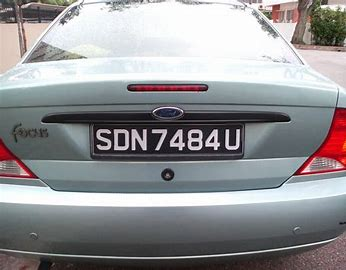

In [7]:
Image(path)

In [8]:
cap = cv2.VideoCapture(path)

In [9]:
confThreshold = 0.4  
nmsThreshold = 0.4  

inpWidth = 416     
inpHeight = 416    

In [10]:
classesFile = "yolo_utils/classes.names";

In [11]:
classes = None
with open(classesFile, 'rt') as f:
    classes = f.read().rstrip('\n').split('\n')

In [12]:
modelConfiguration = "yolo_utils/yolov3_custom.cfg";
modelWeights = "yolo_utils/lapi.weights";

In [13]:
net = cv2.dnn.readNetFromDarknet(modelConfiguration, modelWeights)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

In [14]:
for i in net.getUnconnectedOutLayers() :
    print(i)

200
227
254


In [15]:
def getOutputsNames(net):
    layersNames = net.getLayerNames()
    print(layersNames[0])
    return [layersNames[i - 1] for i in net.getUnconnectedOutLayers()]

In [16]:
getOutputsNames(net)

conv_0


['yolo_82', 'yolo_94', 'yolo_106']

In [17]:
def drawPred(classId, conf, left, top, right, bottom, frame):
    cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 3)

    label = '%.2f' % conf

    if classes:
        assert(classId < len(classes))
        label = '%s:%s' % (classes[classId], label)

    labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    top = max(top, labelSize[1])
    cv2.rectangle(frame, (left, top - round(1.5*labelSize[1])), (left + round(1.5*labelSize[0]), top + baseLine), (0, 0, 255), cv2.FILLED)
    cv2.putText(frame, label, (left, top), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,0,0), 2)

In [18]:
def postprocess(frame, outs):
    frameHeight = frame.shape[0]
    frameWidth = frame.shape[1]
    
    classIds = []
    confidences = []
    boxes = []
    for out in outs:
        print("out.shape : ", out.shape)
        for detection in out:
            #if detection[4]>0.001:
            scores = detection[5:]
            classId = np.argmax(scores)
            #if scores[classId]>confThreshold:
            confidence = scores[classId]
            '''if detection[4]>confThreshold:
                print(detection[4], " - ", scores[classId], " - th : ", confThreshold)
                print(detection)'''
            if confidence > confThreshold:
                center_x = int(detection[0] * frameWidth)
                center_y = int(detection[1] * frameHeight)
                width = int(detection[2] * frameWidth)
                height = int(detection[3] * frameHeight)
                left = int(center_x - width / 2)
                top = int(center_y - height / 2)
                classIds.append(classId)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])

    cropped=None
    indices = cv2.dnn.NMSBoxes(boxes, confidences, confThreshold, nmsThreshold)
    for i in indices:
        print(i)
#         i = i[0]
        box = boxes[i]
        left = box[0]
        top = box[1]
        width = box[2]
        height = box[3]
        
        bottom = top + height
        right = left + width
        
        cropped = frame[top:bottom, left:right].copy()
        drawPred(classIds[i], confidences[i], left, top, right, bottom, frame)
    if cropped is not None:
        return cropped

In [ ]:
# !pip list

[[[ 74  67  58]
  [ 71  64  55]
  [ 73  67  58]
  ...
  [173 175 193]
  [173 173 191]
  [172 172 190]]

 [[ 75  68  59]
  [ 72  65  56]
  [ 72  66  57]
  ...
  [176 178 196]
  [165 165 183]
  [171 171 189]]

 [[ 88  82  80]
  [ 78  72  70]
  [ 64  61  58]
  ...
  [173 175 188]
  [168 167 181]
  [173 172 186]]

 ...

 [[ 91  94 110]
  [ 79  82  98]
  [ 70  73  89]
  ...
  [114 108 131]
  [105  99 122]
  [101  95 118]]

 [[ 76  80  93]
  [ 67  71  84]
  [ 70  74  87]
  ...
  [103  97 119]
  [109 103 125]
  [103  97 119]]

 [[ 73  77  90]
  [ 67  71  84]
  [ 80  84  97]
  ...
  [106 100 122]
  [113 107 129]
  [107 101 123]]]
conv_0
out.shape :  (507, 6)
out.shape :  (2028, 6)
out.shape :  (8112, 6)
0
[[[ 60  59  61]
  [ 66  65  67]
  [ 13  12  14]
  ...
  [ 29  25  30]
  [ 29  25  30]
  [ 28  24  29]]

 [[ 98  99 101]
  [ 38  39  41]
  [ 16  17  19]
  ...
  [ 28  26  30]
  [ 28  26  30]
  [ 29  27  31]]

 [[107 108 110]
  [ 26  27  29]
  [ 30  31  33]
  ...
  [ 34  32  36]
  [ 36  34  38]

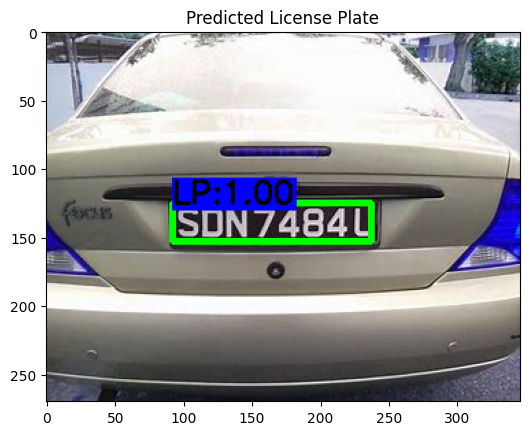

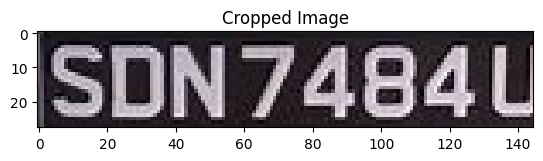

None
Done processing !!!


In [19]:
while cv2.waitKey(1) < 0:

    hasFrame, frame = cap.read()
    print(frame)

    if not hasFrame:
        print("Done processing !!!")
        break

    blob = cv2.dnn.blobFromImage(frame, 1/255, (inpWidth, inpHeight), [0,0,0], 1, crop=False)

    net.setInput(blob)

    outs = net.forward(getOutputsNames(net))

    cropped = postprocess(frame, outs)
    print(cropped)

    plt.imshow(frame)
    plt.title("Predicted License Plate")
    plt.show()
    plt.imshow(cropped)
#     plt.imshow(cv2.cvtColor(aug(image=croped)['image'], cv2.COLOR_BGR2RGB))
    plt.title("Cropped Image")
    plt.show()
#     if cv2.waitKey(1) & 0xFF ==ord('q'):
#         break
# cap.release()
# out.release()
# cv2.destroyAllWindow()

In [21]:
#Easy OCR
!pip install pytesseract --user

In [22]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.4.0
anyio                        3.5.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
attrs                        22.1.0
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       4.1.0
cachetools                   5.3.0
certifi                      2022.12.7
cffi                         1.15.1
charset-normalizer           3.1.0
colorama                     0.4.6
comm                         0.1.2
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.5.1
decorator                    5.1.1
defusedxml                   0.7.1
entrypoints                  0.4
executing                    0.8.3
fastjsonschema               2.16.2
flatbuffers                  23.3.3
flit_core                    3.8.0
fo

In [ ]:
# import sys
# print(sys.path)

In [ ]:
# sys.path.append('c:/users/ayush saxena/appdata/roaming/python/python36/site-packages')

In [ ]:
# !pip show easyocr

In [24]:
import pytesseract

In [25]:
text = pytesseract.image_to_string(cropped)
print(text)

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [ ]:
def find_contours(dimensions, img) :

    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]
    
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]
    
    ii = cv2.imread('contour.jpg')
    
    x_cntr_list = []
    target_contours = []
    img_res = []
    for cntr in cntrs :
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)
        
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
            x_cntr_list.append(intX) 

            char_copy = np.zeros((44,24))
            
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))
            
            cv2.rectangle(ii, (intX,intY), (intWidth+intX, intY+intHeight), (50,21,200), 2)
            plt.imshow(ii, cmap='gray')
            plt.title('Predict Segments')

            
            char = cv2.subtract(255, char)

            # Resize the image to 24x44 with black border
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0

            img_res.append(char_copy) 
            
            
    plt.show()
    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx])
    img_res = np.array(img_res_copy)

    return img_res

In [ ]:
def segment_characters(image) :

    img_lp = cv2.resize(image, (333, 75))
    img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
    _, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_binary_lp = cv2.erode(img_binary_lp, (3,3))
    img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

    LP_WIDTH = img_binary_lp.shape[0]
    LP_HEIGHT = img_binary_lp.shape[1]

    img_binary_lp[0:3,:] = 255
    img_binary_lp[:,0:3] = 255
    img_binary_lp[72:75,:] = 255
    img_binary_lp[:,330:333] = 255

    dimensions = [LP_WIDTH/6,
                       LP_WIDTH/2,
                       LP_HEIGHT/10,
                       2*LP_HEIGHT/3]
    plt.imshow(img_binary_lp, cmap='gray')
    plt.title('Contour')
    plt.show()
    cv2.imwrite('contour.jpg',img_binary_lp)

    char_list = find_contours(dimensions, img_binary_lp)

    return char_list

In [ ]:
char=segment_characters(cropped)

In [ ]:
for i in range(len(char)):
    plt.subplot(1, len(char), i+1)
    plt.imshow(char[i], cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
# from keras.applications.mobilenet import decode_predictions
# from keras.models import Model, load_model
# from keras.layers import Input
# from keras.layers.core import Lambda
# from keras.layers.normalization import BatchNormalization
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D
# from keras.layers.core import Activation
# from keras.layers.core import Dropout
# from keras.layers.core import Dense
# from keras.layers import Flatten
from keras.optimizers import Adam
# from tensorflow.keras.layers import BatchNormalization

In [ ]:
# train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1)
# path = 'data'
# train_generator = train_datagen.flow_from_directory(
#         path+'/train',  # this is the target directory
#         target_size=(28,28),  # all images will be resized to 28x28
#         batch_size=1,
#         class_mode='sparse')

# validation_generator = train_datagen.flow_from_directory(
#         path+'/val',  # this is the target directory
#         target_size=(28,28),  # all images will be resized to 28x28 batch_size=1,
#         class_mode='sparse')

In [ ]:
loaded_model = Sequential()
loaded_model.add(Conv2D(16, (22,22), input_shape=(28, 28, 3), activation='relu', padding='same'))
loaded_model.add(Conv2D(32, (16,16), input_shape=(28, 28, 3), activation='relu', padding='same'))
loaded_model.add(Conv2D(64, (8,8), input_shape=(28, 28, 3), activation='relu', padding='same'))
loaded_model.add(Conv2D(64, (4,4), input_shape=(28, 28, 3), activation='relu', padding='same'))
loaded_model.add(MaxPooling2D(pool_size=(4, 4)))
loaded_model.add(Dropout(0.4))
loaded_model.add(Flatten())
loaded_model.add(Dense(128, activation='relu'))
loaded_model.add(Dense(36, activation='softmax'))


# Restore the weights

loaded_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics='accuracy')

In [ ]:
loaded_model.summary()

In [ ]:
loaded_model.load_weights('checkpoints/my_checkpoint')
# uncomment when the weights are saved or during testing

In [ ]:
# batch_size = 1
# result = loaded_model.fit(
#       train_generator,
#       steps_per_epoch = train_generator.samples // batch_size,
#       validation_data = validation_generator, 
#       epochs = 25, verbose=1, callbacks=None)

In [ ]:
# loaded_model.save_weights('./checkpoints/my_checkpoint')
# Uncomment once just after the training is done

In [ ]:
def fix_dimension(img): 
    new_img = np.zeros((28,28,3))
    for i in range(3):
        new_img[:,:,i] = img
        return new_img
  
def show_results():
    dic = {}
    characters = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    for i,c in enumerate(characters):
        dic[i] = c

    output = []
    for i,ch in enumerate(char): 
        img_ = cv2.resize(ch, (28,28), interpolation=cv2.INTER_AREA)
        img = fix_dimension(img_)
        img = img.reshape(1,28,28,3) 
#         y_ = loaded_model.predict(img)[0]
#         print(y_)
        y_ = np.argmax(loaded_model.predict(img),axis=1)
        character = dic[y_[0]]
        output.append(character) 
        
    plate_number = ''.join(output)
    
    return plate_number

show_results()